In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import json
import os
import re
from copy import deepcopy
import sys
from typing import List, Dict, Tuple, Union, Optional, Any
import torch
from collections import defaultdict
from IPython.display import display

mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["font.size"] = 12

## Simple Avg

In [14]:
fft_avg_data = {
    num_tasks: pd.read_csv(f"fft_average_num-tasks={num_tasks}.csv")
    for num_tasks in range(2, 8)
}
lora_avg_data = {
    num_tasks: pd.read_csv(f"lora_average_num-tasks={num_tasks}.csv")
    for num_tasks in range(2, 8)
}
l_lora_avg_data = {
    num_tasks: pd.read_csv(f"l_lora_average_num-tasks={num_tasks}.csv")
    for num_tasks in range(2, 8)
}

In [15]:
fft_avg_data[2].head()

,dataset:0,dataset:1,glue-cola,glue-mnli,glue-mrpc,glue-qqp,glue-rte,glue-sst2,glue-stsb
0,glue-cola,glue-mnli,0.704698,0.6575,0.000000,0.000000,0.285199,0.002294,NaN
1,glue-cola,glue-mrpc,0.713327,0.0000,0.666667,0.000000,0.000000,0.000000,NaN
2,glue-cola,glue-qqp,0.698945,0.0000,0.000000,0.789375,0.000000,0.001147,NaN
3,glue-cola,glue-rte,0.701822,0.0000,0.000000,0.000000,0.776173,0.000000,NaN
4,glue-cola,glue-sst2,0.696069,0.0000,0.000000,0.000000,0.000000,0.911697,NaN


In [23]:
def get_row_mean(
    row,
    col_names: List[str] = [
        "glue-cola",
        "glue-mnli",
        "glue-mrpc",
        "glue-qqp",
        "glue-rte",
        "glue-sst2",
        "glue-stsb",
    ],
):
    zero_if_nan = lambda x: 0 if np.isnan(x) else x
    s = 0
    for col in col_names:
        s += zero_if_nan(row[col])
    return s / len(col_names)


def append_mean_col(df: pd.DataFrame) -> pd.DataFrame:
    df = deepcopy(df)
    df["mean"] = df.apply(get_row_mean, axis=1)
    return df

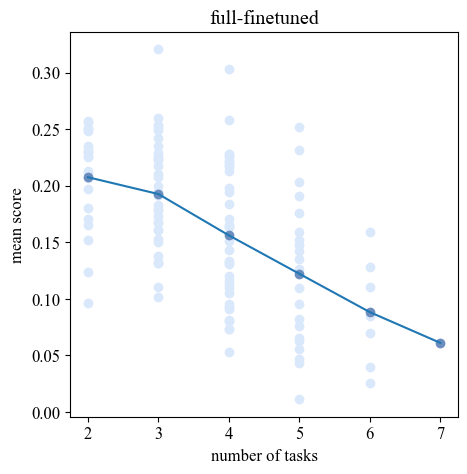

In [17]:
title = "full-finetuned"
data = fft_avg_data
# --------------
results = {num_tasks: append_mean_col(data[num_tasks]) for num_tasks in data.keys()}
# for num_tasks in results:
#     print(num_tasks)
#     display(results[num_tasks])

fig, axes = plt.subplots(1, 1, figsize=(5, 5), squeeze=False)
ax: plt.Axes = axes[0, 0]
Y_mean = []
for num_tasks in results:
    Y = np.array(results[num_tasks]["mean"])
    X = np.ones_like(Y) * num_tasks
    Y_mean.append(Y.mean())
    ax.scatter(X, Y, color="#DAE8FC")
    ax.scatter([num_tasks], [Y.mean()], color="#6C8EBF")
ax.plot(np.array(list(results.keys())), np.array(Y_mean))

ax.set_title(title)
ax.set_xlabel("number of tasks")
ax.set_ylabel("mean score")
plt.show()

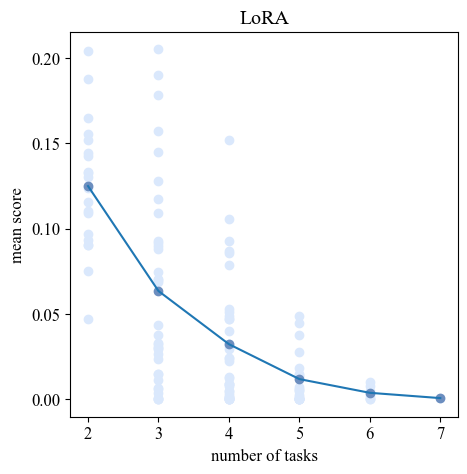

In [18]:
title = "LoRA"
data = lora_avg_data
# --------------
results = {num_tasks: append_mean_col(data[num_tasks]) for num_tasks in data.keys()}
# for num_tasks in results:
#     print(num_tasks)
#     display(results[num_tasks])

fig, axes = plt.subplots(1, 1, figsize=(5, 5), squeeze=False)
ax: plt.Axes = axes[0, 0]
Y_mean = []
for num_tasks in results:
    Y = np.array(results[num_tasks]["mean"])
    X = np.ones_like(Y) * num_tasks
    Y_mean.append(Y.mean())
    ax.scatter(X, Y, color="#DAE8FC")
    ax.scatter([num_tasks], [Y.mean()], color="#6C8EBF")
ax.plot(np.array(list(results.keys())), np.array(Y_mean))

ax.set_title(title)
ax.set_xlabel("number of tasks")
ax.set_ylabel("mean score")
plt.show()

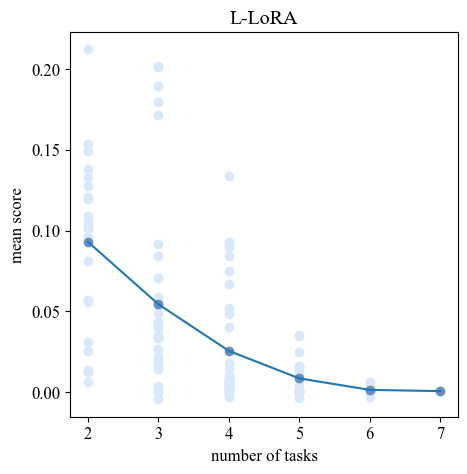

In [19]:
title = "L-LoRA"
data = l_lora_avg_data
# --------------
results = {num_tasks: append_mean_col(data[num_tasks]) for num_tasks in data.keys()}
# for num_tasks in results:
#     print(num_tasks)
#     display(results[num_tasks])

fig, axes = plt.subplots(1, 1, figsize=(5, 5), squeeze=False)
ax: plt.Axes = axes[0, 0]
Y_mean = []
for num_tasks in results:
    Y = np.array(results[num_tasks]["mean"])
    X = np.ones_like(Y) * num_tasks
    Y_mean.append(Y.mean())
    ax.scatter(X, Y, color="#DAE8FC")
    ax.scatter([num_tasks], [Y.mean()], color="#6C8EBF")
ax.plot(np.array(list(results.keys())), np.array(Y_mean))

ax.set_title(title)
ax.set_xlabel("number of tasks")
ax.set_ylabel("mean score")
plt.show()

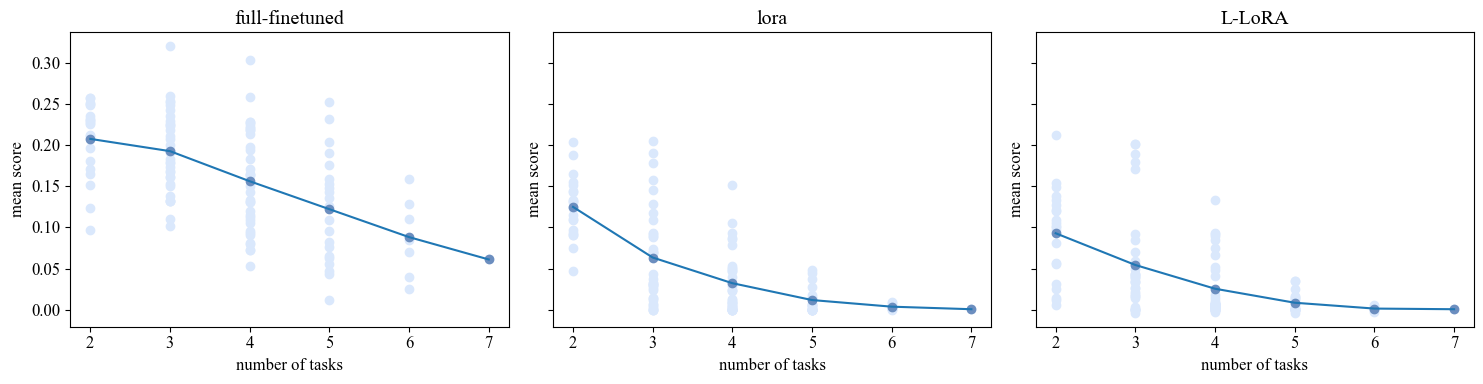

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), squeeze=False, sharey=True)

title = "full-finetuned"
data = fft_avg_data
# --------------
results = {num_tasks: append_mean_col(data[num_tasks]) for num_tasks in data.keys()}
# for num_tasks in results:
#     print(num_tasks)
#     display(results[num_tasks])

ax: plt.Axes = axes[0, 0]
Y_mean = []
for num_tasks in results:
    Y = np.array(results[num_tasks]["mean"])
    X = np.ones_like(Y) * num_tasks
    Y_mean.append(Y.mean())
    ax.scatter(X, Y, color="#DAE8FC")
    ax.scatter([num_tasks], [Y.mean()], color="#6C8EBF")
ax.plot(np.array(list(results.keys())), np.array(Y_mean))

ax.set_title(title)
ax.set_xlabel("number of tasks")
ax.set_ylabel("mean score")


title = "lora"
data = lora_avg_data
# --------------
results = {num_tasks: append_mean_col(data[num_tasks]) for num_tasks in data.keys()}
# for num_tasks in results:
#     print(num_tasks)
#     display(results[num_tasks])

ax: plt.Axes = axes[0, 1]
Y_mean = []
for num_tasks in results:
    Y = np.array(results[num_tasks]["mean"])
    X = np.ones_like(Y) * num_tasks
    Y_mean.append(Y.mean())
    ax.scatter(X, Y, color="#DAE8FC")
    ax.scatter([num_tasks], [Y.mean()], color="#6C8EBF")
ax.plot(np.array(list(results.keys())), np.array(Y_mean))

ax.set_title(title)
ax.set_xlabel("number of tasks")
ax.set_ylabel("mean score")

title = "L-LoRA"
data = l_lora_avg_data
# --------------
results = {num_tasks: append_mean_col(data[num_tasks]) for num_tasks in data.keys()}
# for num_tasks in results:
#     print(num_tasks)
#     display(results[num_tasks])

ax: plt.Axes = axes[0, 2]
Y_mean = []
for num_tasks in results:
    Y = np.array(results[num_tasks]["mean"])
    X = np.ones_like(Y) * num_tasks
    Y_mean.append(Y.mean())
    ax.scatter(X, Y, color="#DAE8FC")
    ax.scatter([num_tasks], [Y.mean()], color="#6C8EBF")
ax.plot(np.array(list(results.keys())), np.array(Y_mean))

ax.set_title(title)
ax.set_xlabel("number of tasks")
ax.set_ylabel("mean score")
fig.set_tight_layout(True)
plt.show()

## Task Arithmetic

In [9]:
fft_data = {
    num_tasks: pd.read_csv(f"fft_task_addition_num-tasks={num_tasks}.csv")
    for num_tasks in range(2, 8)
}
lora_data = {
    num_tasks: pd.read_csv(f"lora_task_addition_num-tasks={num_tasks}.csv")
    for num_tasks in range(2, 8)
}
l_lora_data = {
    num_tasks: pd.read_csv(f"l_lora_task_addition_num-tasks={num_tasks}.csv")
    for num_tasks in range(2, 8)
}

In [10]:
fft_data[2]

,scaling_factor,dataset:0,dataset:1,glue-cola,glue-mnli,glue-mrpc,glue-qqp,glue-rte,glue-sst2,glue-stsb
0,0.00,glue-cola,glue-mnli,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN
1,0.05,glue-cola,glue-mnli,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN
2,0.10,glue-cola,glue-mnli,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN
3,0.15,glue-cola,glue-mnli,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN
4,0.20,glue-cola,glue-mnli,0.042186,0.0,0.0,0.0,0.0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
436,0.80,glue-sst2,glue-stsb,0.000000,0.0,0.0,0.0,0.0,0.927752,0.879889
437,0.85,glue-sst2,glue-stsb,0.000000,0.0,0.0,0.0,0.0,0.928899,0.881823
438,0.90,glue-sst2,glue-stsb,0.000000,0.0,0.0,0.0,0.0,0.932339,0.882700
439,0.95,glue-sst2,glue-stsb,0.000000,0.0,0.0,0.0,0.0,0.930046,0.884876


In [8]:
def get_row_mean(
    row,
    col_names: List[str] = [
        "glue-cola",
        "glue-mnli",
        "glue-mrpc",
        "glue-qqp",
        "glue-rte",
        "glue-sst2",
        "glue-stsb",
    ],
):
    zero_if_nan = lambda x: 0 if np.isnan(x) else x
    s = 0
    for col in col_names:
        s += zero_if_nan(row[col])
    return s / len(col_names)

In [9]:
def get_max_row_mean(data):
    """
    Computes the row with the highest mean for each group of tasks and datasets in the input data.

    Args:
        data (dict): A dictionary of pandas DataFrames where each key represents the number of tasks in the dataset.

    Returns:
        dict: A dictionary of pandas DataFrames where each DataFrame contains the row with the highest mean for each group of tasks and datasets.
    """
    results = defaultdict(lambda: list())
    for num_tasks in data.keys():
        group = data[num_tasks].groupby([f"dataset:{i}" for i in range(num_tasks)])
        for g in group:
            tasks = g[0]
            max_mean = float("-inf")
            max_index = 0
            for i, row in g[1].iterrows():
                mean = get_row_mean(row)
                if mean > max_mean:
                    max_mean = mean
                    max_index = i
            row = deepcopy(data[num_tasks].iloc[max_index])
            row.loc["mean"] = max_mean
            results[num_tasks].append(row)
        results[num_tasks] = pd.DataFrame(results[num_tasks])
    return results

In [13]:
for data in [fft_data, lora_data, l_lora_data]:
    results = get_max_row_mean(data)
    for num_tasks in results:
        print(num_tasks, len(results[num_tasks]))
    print()

2 21
3 35
4 35
5 21
6 7
7 1

2 21
3 35
4 35
5 21
6 7
7 1

2 21
3 35
4 35
5 21
6 7
7 1



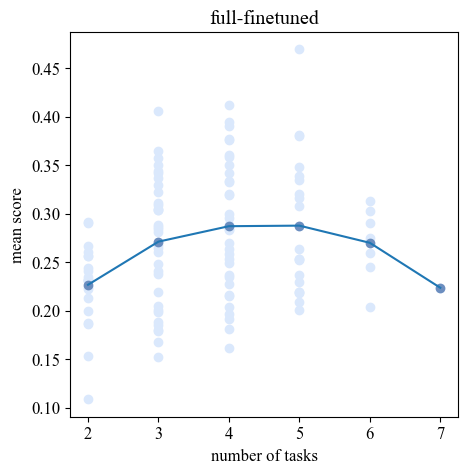

In [21]:
title = "full-finetuned"
data = fft_data
# --------------
results = get_max_row_mean(data)
# for num_tasks in results:
#     print(num_tasks)
#     display(results[num_tasks])

fig, axes = plt.subplots(1, 1, figsize=(5, 5), squeeze=False)
ax: plt.Axes = axes[0, 0]
Y_mean = []
for num_tasks in results:
    Y = np.array(results[num_tasks]["mean"])
    X = np.ones_like(Y) * num_tasks
    Y_mean.append(Y.mean())
    ax.scatter(X, Y, color="#DAE8FC")
    ax.scatter([num_tasks], [Y.mean()], color="#6C8EBF")
ax.plot(np.array(list(results.keys())), np.array(Y_mean))

ax.set_title(title)
ax.set_xlabel("number of tasks")
ax.set_ylabel("mean score")
plt.show()

# --------------
for num_tasks in results.keys():
    df: pd.DataFrame = results[num_tasks]
    df.to_csv(f"reduced/fft_task_addition_num-tasks={num_tasks}.csv", index=False)

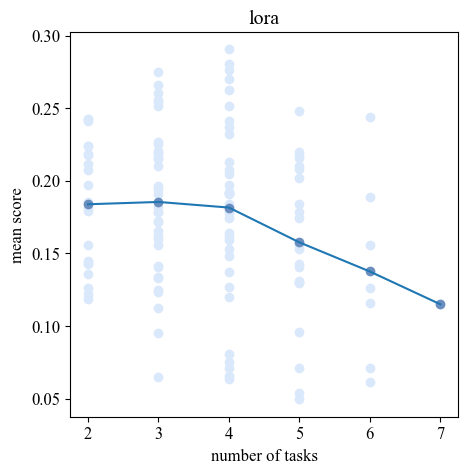

In [20]:
title = "lora"
data = lora_data
# --------------
results = get_max_row_mean(data)
# for num_tasks in results:
#     print(num_tasks)
#     display(results[num_tasks])

fig, axes = plt.subplots(1, 1, figsize=(5, 5), squeeze=False)
ax: plt.Axes = axes[0, 0]
Y_mean = []
for num_tasks in results:
    Y = np.array(results[num_tasks]["mean"])
    X = np.ones_like(Y) * num_tasks
    Y_mean.append(Y.mean())
    ax.scatter(X, Y, color="#DAE8FC")
    ax.scatter([num_tasks], [Y.mean()], color="#6C8EBF")
ax.plot(np.array(list(results.keys())), np.array(Y_mean))

ax.set_title(title)
ax.set_xlabel("number of tasks")
ax.set_ylabel("mean score")
plt.show()

# --------------
for num_tasks in results.keys():
    df: pd.DataFrame = results[num_tasks]
    df.to_csv(f"reduced/lora_task_addition_num-tasks={num_tasks}.csv", index=False)

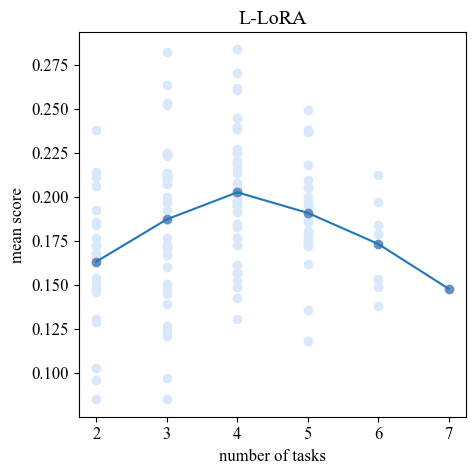

In [18]:
title = "L-LoRA"
data = l_lora_data
# --------------
results = get_max_row_mean(data)
# for num_tasks in results:
#     print(num_tasks)
#     display(results[num_tasks])

fig, axes = plt.subplots(1, 1, figsize=(5, 5), squeeze=False)
ax: plt.Axes = axes[0, 0]
Y_mean = []
for num_tasks in results:
    Y = np.array(results[num_tasks]["mean"])
    X = np.ones_like(Y) * num_tasks
    Y_mean.append(Y.mean())
    ax.scatter(X, Y, color="#DAE8FC")
    ax.scatter([num_tasks], [Y.mean()], color="#6C8EBF")
ax.plot(np.array(list(results.keys())), np.array(Y_mean))

ax.set_title(title)
ax.set_xlabel("number of tasks")
ax.set_ylabel("mean score")
plt.show()

# --------------
for num_tasks in results.keys():
    df: pd.DataFrame = results[num_tasks]
    df.to_csv(f"reduced/l_lora_task_addition_num-tasks={num_tasks}.csv", index=False)

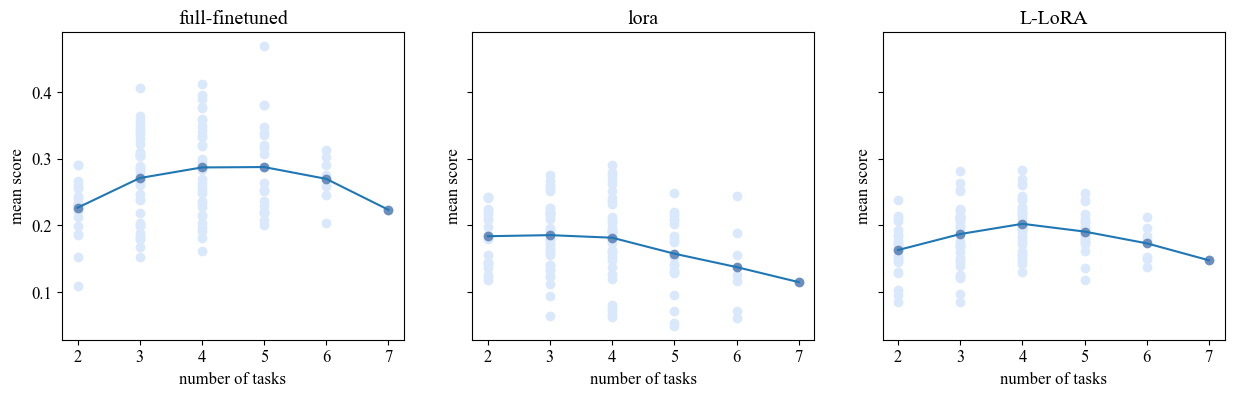

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), squeeze=False, sharey=True)

title = "full-finetuned"
data = fft_data
# --------------
results = get_max_row_mean(data)
# for num_tasks in results:
#     print(num_tasks)
#     display(results[num_tasks])

ax: plt.Axes = axes[0, 0]
Y_mean = []
for num_tasks in results:
    Y = np.array(results[num_tasks]["mean"])
    X = np.ones_like(Y) * num_tasks
    Y_mean.append(Y.mean())
    ax.scatter(X, Y, color="#DAE8FC")
    ax.scatter([num_tasks], [Y.mean()], color="#6C8EBF")
ax.plot(np.array(list(results.keys())), np.array(Y_mean))

ax.set_title(title)
ax.set_xlabel("number of tasks")
ax.set_ylabel("mean score")


title = "lora"
data = lora_data
# --------------
results = get_max_row_mean(data)
# for num_tasks in results:
#     print(num_tasks)
#     display(results[num_tasks])

ax: plt.Axes = axes[0, 1]
Y_mean = []
for num_tasks in results:
    Y = np.array(results[num_tasks]["mean"])
    X = np.ones_like(Y) * num_tasks
    Y_mean.append(Y.mean())
    ax.scatter(X, Y, color="#DAE8FC")
    ax.scatter([num_tasks], [Y.mean()], color="#6C8EBF")
ax.plot(np.array(list(results.keys())), np.array(Y_mean))

ax.set_title(title)
ax.set_xlabel("number of tasks")
ax.set_ylabel("mean score")


title = "L-LoRA"
data = l_lora_data
# --------------
results = get_max_row_mean(data)
# for num_tasks in results:
#     print(num_tasks)
#     display(results[num_tasks])

ax: plt.Axes = axes[0, 2]
Y_mean = []
for num_tasks in results:
    Y = np.array(results[num_tasks]["mean"])
    X = np.ones_like(Y) * num_tasks
    Y_mean.append(Y.mean())
    ax.scatter(X, Y, color="#DAE8FC")
    ax.scatter([num_tasks], [Y.mean()], color="#6C8EBF")
ax.plot(np.array(list(results.keys())), np.array(Y_mean))

ax.set_title(title)
ax.set_xlabel("number of tasks")
ax.set_ylabel("mean score")
plt.show()

## ties merging

In [10]:
fft_data = {
    num_tasks: pd.read_csv(f"fft_ties_merging_num-tasks={num_tasks}.csv")
    for num_tasks in range(2, 8)
}
lora_data = {
    num_tasks: pd.read_csv(f"lora_ties_merging_num-tasks={num_tasks}.csv")
    for num_tasks in range(2, 8)
}
l_lora_data = {
    num_tasks: pd.read_csv(f"l_lora_ties_merging_num-tasks={num_tasks}.csv")
    for num_tasks in range(2, 8)
}

In [11]:
fft_data[2]

,scaling_factor,k,dataset:0,dataset:1,glue-cola,glue-mnli,glue-mrpc,glue-qqp,glue-rte,glue-sst2,glue-stsb
0,0.0,0.25,glue-cola,glue-mnli,0.000000,0.000000,0.0,0.0,0.0,0.0,NaN
1,0.1,0.25,glue-cola,glue-mnli,0.000000,0.000000,0.0,0.0,0.0,0.0,NaN
2,0.2,0.25,glue-cola,glue-mnli,0.000000,0.000000,0.0,0.0,0.0,0.0,NaN
3,0.3,0.25,glue-cola,glue-mnli,0.000000,0.000000,0.0,0.0,0.0,0.0,NaN
4,0.4,0.25,glue-cola,glue-mnli,0.135187,0.004375,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
919,0.6,1.00,glue-sst2,glue-stsb,0.000000,0.000000,0.0,0.0,0.0,0.0,0.865982
920,0.7,1.00,glue-sst2,glue-stsb,0.000000,0.000000,0.0,0.0,0.0,0.0,0.879777
921,0.8,1.00,glue-sst2,glue-stsb,0.000000,0.000000,0.0,0.0,0.0,0.0,0.888273
922,0.9,1.00,glue-sst2,glue-stsb,0.000000,0.000000,0.0,0.0,0.0,0.0,0.893830


In [12]:
for data in [
    fft_data,
    lora_data,
    # l_lora_data,
]:
    results = get_max_row_mean(data)
    for num_tasks in results:
        print(num_tasks, len(results[num_tasks]))
    print()

2 21
3 35
4 35
5 21
6 7
7 1

2 21
3 35
4 35
5 21
6 7
7 1



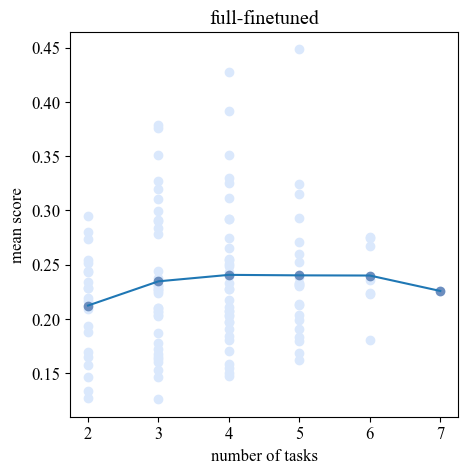

In [13]:
title = "full-finetuned"
data = fft_data
# --------------
results = get_max_row_mean(data)
# for num_tasks in results:
#     print(num_tasks)
#     display(results[num_tasks])

fig, axes = plt.subplots(1, 1, figsize=(5, 5), squeeze=False)
ax: plt.Axes = axes[0, 0]
Y_mean = []
for num_tasks in results:
    Y = np.array(results[num_tasks]["mean"])
    X = np.ones_like(Y) * num_tasks
    Y_mean.append(Y.mean())
    ax.scatter(X, Y, color="#DAE8FC")
    ax.scatter([num_tasks], [Y.mean()], color="#6C8EBF")
ax.plot(np.array(list(results.keys())), np.array(Y_mean))

ax.set_title(title)
ax.set_xlabel("number of tasks")
ax.set_ylabel("mean score")
plt.show()

# --------------
for num_tasks in results.keys():
    df: pd.DataFrame = results[num_tasks]
    df.to_csv(f"reduced/fft_ties_merging_num-tasks={num_tasks}.csv", index=False)

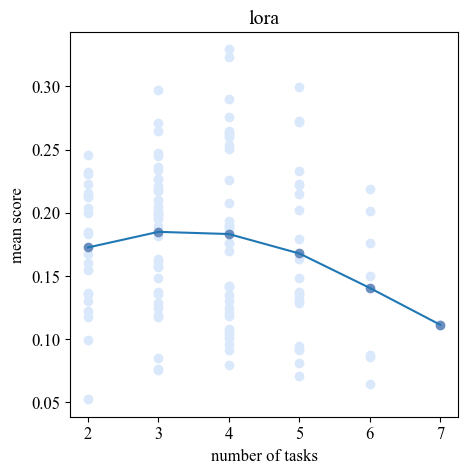

In [14]:
title = "lora"
data = lora_data
# --------------
results = get_max_row_mean(data)
# for num_tasks in results:
#     print(num_tasks)
#     display(results[num_tasks])

fig, axes = plt.subplots(1, 1, figsize=(5, 5), squeeze=False)
ax: plt.Axes = axes[0, 0]
Y_mean = []
for num_tasks in results:
    Y = np.array(results[num_tasks]["mean"])
    X = np.ones_like(Y) * num_tasks
    Y_mean.append(Y.mean())
    ax.scatter(X, Y, color="#DAE8FC")
    ax.scatter([num_tasks], [Y.mean()], color="#6C8EBF")
ax.plot(np.array(list(results.keys())), np.array(Y_mean))

ax.set_title(title)
ax.set_xlabel("number of tasks")
ax.set_ylabel("mean score")
plt.show()

# --------------
for num_tasks in results.keys():
    df: pd.DataFrame = results[num_tasks]
    df.to_csv(f"reduced/lora_ties_merging_num-tasks={num_tasks}.csv", index=False)

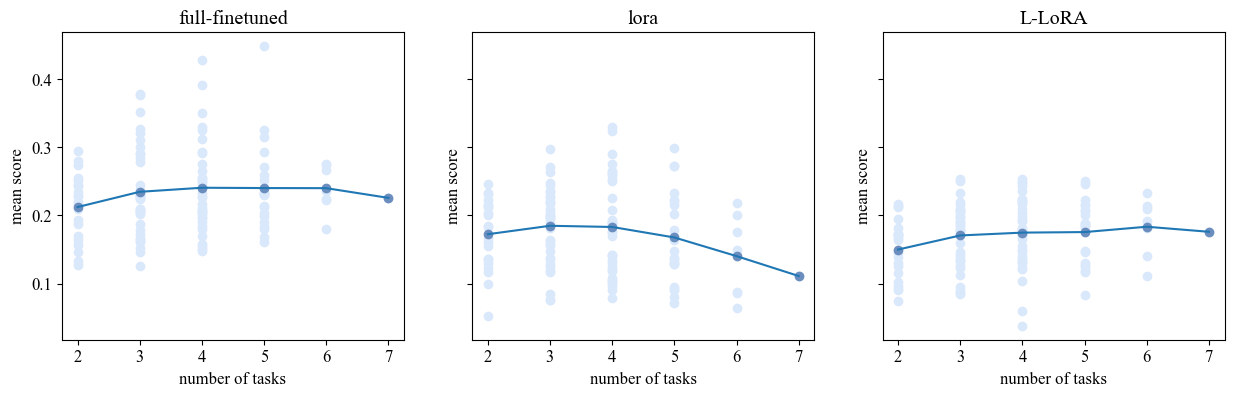

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), squeeze=False, sharey=True)

title = "full-finetuned"
data = fft_data
# --------------
results = get_max_row_mean(data)
# for num_tasks in results:
#     print(num_tasks)
#     display(results[num_tasks])

ax: plt.Axes = axes[0, 0]
Y_mean = []
for num_tasks in results:
    Y = np.array(results[num_tasks]["mean"])
    X = np.ones_like(Y) * num_tasks
    Y_mean.append(Y.mean())
    ax.scatter(X, Y, color="#DAE8FC")
    ax.scatter([num_tasks], [Y.mean()], color="#6C8EBF")
ax.plot(np.array(list(results.keys())), np.array(Y_mean))

ax.set_title(title)
ax.set_xlabel("number of tasks")
ax.set_ylabel("mean score")


title = "lora"
data = lora_data
# --------------
results = get_max_row_mean(data)
# for num_tasks in results:
#     print(num_tasks)
#     display(results[num_tasks])

ax: plt.Axes = axes[0, 1]
Y_mean = []
for num_tasks in results:
    Y = np.array(results[num_tasks]["mean"])
    X = np.ones_like(Y) * num_tasks
    Y_mean.append(Y.mean())
    ax.scatter(X, Y, color="#DAE8FC")
    ax.scatter([num_tasks], [Y.mean()], color="#6C8EBF")
ax.plot(np.array(list(results.keys())), np.array(Y_mean))

ax.set_title(title)
ax.set_xlabel("number of tasks")
ax.set_ylabel("mean score")

title = "L-LoRA"
data = l_lora_data
# --------------
results = get_max_row_mean(data)
# for num_tasks in results:
#     print(num_tasks)
#     display(results[num_tasks])

ax: plt.Axes = axes[0, 2]
Y_mean = []
for num_tasks in results:
    Y = np.array(results[num_tasks]["mean"])
    X = np.ones_like(Y) * num_tasks
    Y_mean.append(Y.mean())
    ax.scatter(X, Y, color="#DAE8FC")
    ax.scatter([num_tasks], [Y.mean()], color="#6C8EBF")
ax.plot(np.array(list(results.keys())), np.array(Y_mean))

ax.set_title(title)
ax.set_xlabel("number of tasks")
ax.set_ylabel("mean score")
plt.show()

## LoraHub

In [18]:
# fft_data = {
#     num_tasks: pd.read_csv(f"fft_lorahub_num-tasks={num_tasks}.csv")
#     for num_tasks in range(2, 8)
# }
lora_data = {
    num_tasks: pd.read_csv(f"lora_lorahub_num-tasks={num_tasks}.csv")
    for num_tasks in range(2, 8)
}
l_lora_data = {
    num_tasks: pd.read_csv(f"l_lora_lorahub_num-tasks={num_tasks}.csv")
    for num_tasks in range(2, 8)
}

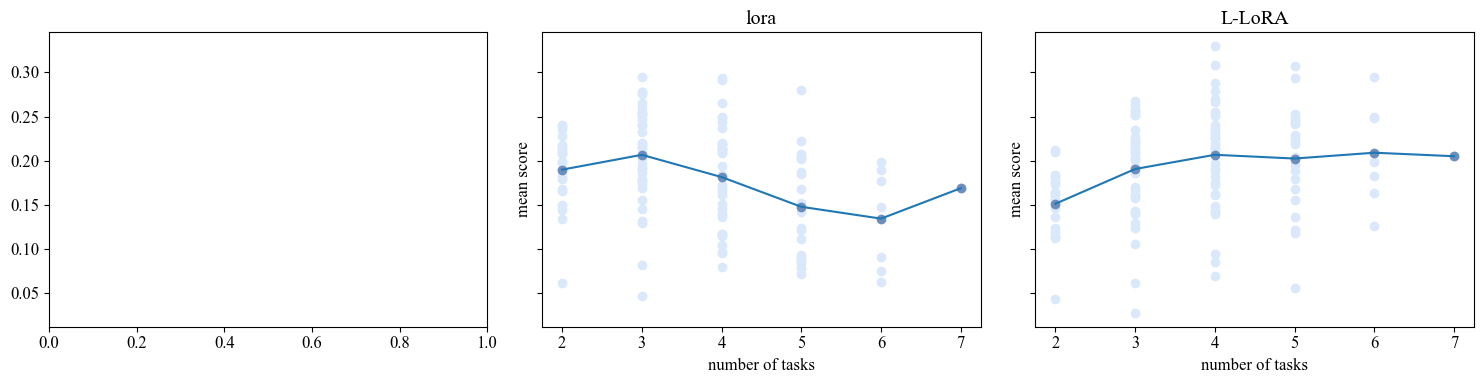

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), squeeze=False, sharey=True)

# title = "full-finetuned"
# data = fft_avg_data
# # --------------
# results = {num_tasks: append_mean_col(data[num_tasks]) for num_tasks in data.keys()}
# # for num_tasks in results:
# #     print(num_tasks)
# #     display(results[num_tasks])

# ax: plt.Axes = axes[0, 0]
# Y_mean = []
# for num_tasks in results:
#     Y = np.array(results[num_tasks]["mean"])
#     X = np.ones_like(Y) * num_tasks
#     Y_mean.append(Y.mean())
#     ax.scatter(X, Y, color="#DAE8FC")
#     ax.scatter([num_tasks], [Y.mean()], color="#6C8EBF")
# ax.plot(np.array(list(results.keys())), np.array(Y_mean))

# ax.set_title(title)
# ax.set_xlabel("number of tasks")
# ax.set_ylabel("mean score")


title = "lora"
data = lora_data
# --------------
results = {num_tasks: append_mean_col(data[num_tasks]) for num_tasks in data.keys()}
# for num_tasks in results:
#     print(num_tasks)
#     display(results[num_tasks])

ax: plt.Axes = axes[0, 1]
Y_mean = []
for num_tasks in results:
    Y = np.array(results[num_tasks]["mean"])
    X = np.ones_like(Y) * num_tasks
    Y_mean.append(Y.mean())
    ax.scatter(X, Y, color="#DAE8FC")
    ax.scatter([num_tasks], [Y.mean()], color="#6C8EBF")
ax.plot(np.array(list(results.keys())), np.array(Y_mean))

ax.set_title(title)
ax.set_xlabel("number of tasks")
ax.set_ylabel("mean score")

title = "L-LoRA"
data = l_lora_data
# --------------
results = {num_tasks: append_mean_col(data[num_tasks]) for num_tasks in data.keys()}
# for num_tasks in results:
#     print(num_tasks)
#     display(results[num_tasks])

ax: plt.Axes = axes[0, 2]
Y_mean = []
for num_tasks in results:
    Y = np.array(results[num_tasks]["mean"])
    X = np.ones_like(Y) * num_tasks
    Y_mean.append(Y.mean())
    ax.scatter(X, Y, color="#DAE8FC")
    ax.scatter([num_tasks], [Y.mean()], color="#6C8EBF")
ax.plot(np.array(list(results.keys())), np.array(Y_mean))

ax.set_title(title)
ax.set_xlabel("number of tasks")
ax.set_ylabel("mean score")
fig.set_tight_layout(True)
plt.show()